# Monte carlo simulation

In [1]:
import numpy as np
import polars as pl
from polars import col
import matplotlib.pyplot as plt
import seaborn as sb

%load_ext autoreload
%autoreload 2
plt.style.use("../matplotlibrc")

In [2]:
from findec.returns import draw_lognormal_return
from findec.utility import composite_crra_utility

In [3]:
from findec.dataclasses import Preferences

preferences = Preferences()

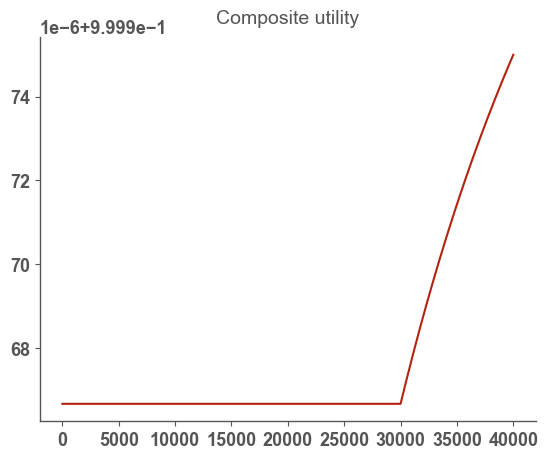

In [4]:
w = np.linspace(0, 40e3, 1000)
u = np.array([composite_crra_utility(wi, pref=preferences) for wi in w])
fig, ax = plt.subplots()
ax.plot(w, u)
ax.set_title("Composite utility");

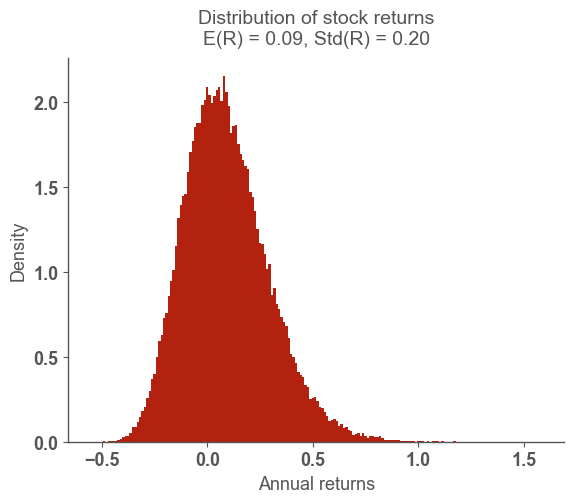

In [5]:
stock_returns = draw_lognormal_return(mean_return=0.09, stdev=0.2, n_sims=100_000)
fig, ax = plt.subplots()
ax.hist(stock_returns, bins="auto", density=True)
stock_returns_mean = stock_returns.mean()
stock_returns_std = stock_returns.std()
ax.set_xlabel("Annual returns")
ax.set_ylabel("Density")
ax.set_title(
    f"Distribution of stock returns\nE(R) = {stock_returns_mean:.2f}, Std(R) = {stock_returns_std:.2f}"
);

In [6]:
from findec.simulate import simulate_life_paths, simulate_life_path
from findec.dataclasses import Assets

In [7]:
initial_assets = Assets(tax_free=400_000.0, taxable=600_000.0, tax_rate=0.2)

sims = simulate_life_paths(
    n_sims=10,
    expected_return_risky=0.09,
    std_dev_return_risky=0.20,
    risk_free_rate=0.04,
    pref=preferences,
    a=initial_assets,
    social_security=30_000.0,
    time_horizon=20,
    starting_age=65,
    is_male=False,
    rng_seed_offset=42,
    with_survival_probabilities=False,
)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 212.82it/s]


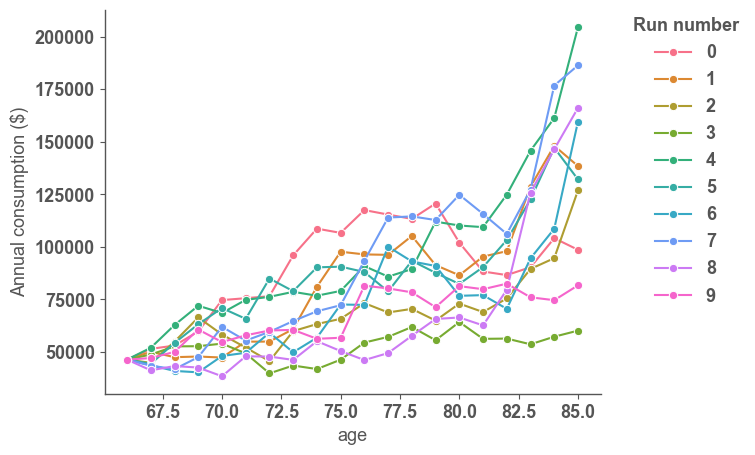

In [8]:
ax = sb.lineplot(sims, x="age", y="consumption", hue="run_number", marker="o")
plt.legend(
    bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, title="Run number"
)
ax.set_ylabel("Annual consumption ($)");

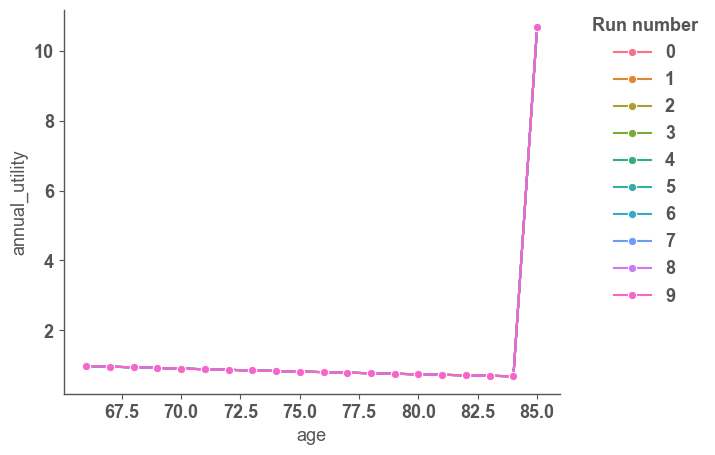

In [9]:
ax = sb.lineplot(sims, x="age", y="annual_utility", hue="run_number", marker="o")
plt.legend(
    bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, title="Run number"
);

In [10]:
sims.sort("age").group_by("run_number").agg(col("bequest").last()).sort("run_number")

run_number,bequest
str,f64
"""0""",747288.52609
"""1""",1.0904e6
"""2""",969405.108274
"""3""",529772.722611
"""4""",1.5155e6
"""5""",1.1582e6
"""6""",1.7290e6
"""7""",1.7191e6
"""8""",1.7493e6


In [11]:
sims.filter(col("age")==84)

age,alive,tax_free,taxable,risky_return,consumption,consumption_fraction,total_utility,annual_utility,bequest,run_number
i64,bool,f64,f64,f64,f64,f64,f64,f64,f64,str
84,true,897437.261925,0.0,-0.091183,104139.3897,0.105204,15.678265,0.686424,null,"""0"""
84,true,1.2504e6,0.0,-0.113852,148102.158724,0.105204,15.678233,0.686426,null,"""1"""
84,true,1.1479e6,0.0,0.245911,94631.735571,0.105204,15.678206,0.686424,null,"""2"""
84,true,566616.49286,70070.397391,0.048657,57284.589708,0.105204,15.678155,0.686419,null,"""3"""
84,true,1.8361e6,0.0,0.440651,161293.073623,0.105204,15.678264,0.686427,null,"""4"""
84,true,1.1941e6,0.0,-0.157245,147150.604283,0.105204,15.678251,0.686426,null,"""5"""
84,true,1.4380e6,0.0,0.423721,108638.114104,0.105204,15.6782,0.686424,null,"""6"""
84,true,1.6751e6,0.0,0.100239,176752.489813,0.105204,15.678238,0.686427,null,"""7"""
84,true,1.5735e6,100644.586128,0.096541,146433.455847,0.105204,15.678164,0.686426,null,"""8"""


In [12]:
sims.filter(col("age")==85)

age,alive,tax_free,taxable,risky_return,consumption,consumption_fraction,total_utility,annual_utility,bequest,run_number
i64,bool,f64,f64,f64,f64,f64,f64,f64,f64,str
85,true,747288.52609,0.0,-0.170867,98620.825476,0.112806,26.351095,10.672831,747288.52609,"""0"""
85,true,1.0904e6,0.0,-0.088134,138438.6574,0.112806,26.351108,10.672875,1.0904e6,"""1"""
85,true,969405.108274,0.0,-0.139746,126871.640286,0.112806,26.351069,10.672863,969405.108274,"""2"""
85,true,507502.834039,22269.888573,-0.190924,60165.219281,0.112806,26.350926,10.672771,529772.722611,"""3"""
85,true,1.5155e6,0.0,-0.159357,204507.692809,0.112806,26.351166,10.672902,1.5155e6,"""4"""
85,true,1.1582e6,0.0,0.082254,132088.378434,0.112806,26.351131,10.67288,1.1582e6,"""5"""
85,true,1.7290e6,0.0,0.500043,159602.158928,0.112806,26.351109,10.672909,1.7290e6,"""6"""
85,true,1.7191e6,0.0,0.194237,186342.278871,0.112806,26.351147,10.67291,1.7191e6,"""7"""
85,true,1.7493e6,0.0,0.227262,166106.650494,0.112806,26.351074,10.67291,1.7493e6,"""8"""
